In [1]:
state = 'MT' 
year = 2020

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of MT has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from MT_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 0 plans from file.


In [6]:
obj_type = 'cut_edges'
starting_deviation = 0.01 
verbose = True
contiguity = 'lcut'               # {'lcut', 'scf', 'shir'}
warm_start_mode = 'user'          # {'None', 'user', 'refinement'}
warm_starts = warm_starts         # if you have user define warm starts else it is None
time_limit = 7200                 # Time limit in seconds, adjust as needed
multiplier = 0                    # Adjust multiplier as needed
max_B = True                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True
symmetry_breaking = 'orbitope'    # {None, 'orbitope', 'rsum'}              
sizes = None

In [7]:
print(f"Running epsilon constraint method for state {state}, objective {obj_type}")
print(f"{'#' * 100}\n")
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity,        
            cutoff=None,       
            verbose=verbose,
            warm_start_mode = warm_start_mode,
            warm_starts=warm_starts,  
            starting_deviation=starting_deviation, 
            time_limit=time_limit, 
            sizes=sizes,      
            max_B=max_B,      
            symmetry_breaking=symmetry_breaking,
            state=state,
            year=year
        )

Running epsilon constraint method for state MT, objective cut_edges
####################################################################################################

L = 536692 and U = 547533

****************************************
Trying deviation = 5421.125
****************************************
No valid warm start used.

****************************************
Running labeling model!
****************************************
L = 536692 and U = 547533
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

C


Solution count 1: 10 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.000000000000e+01, best bound 1.000000000000e+01, gap 0.0000%

User-callback calls 646, time in user-callback 0.42 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[1, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 55], [0, 2, 3, 4, 13, 23, 26, 28, 29, 31, 35, 39, 40, 50, 52, 54]]

****************************************
Trying deviation = 2708.25
****************************************
No valid warm start used.

****************************************
Running labeling model!
****************************************
L = 539405 and U = 544820
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter MIPGap 

     0     0    6.10428    0  100          -    6.10428      -     -    0s
     0     0    6.12611    0   93          -    6.12611      -     -    0s
     0     0    6.12687    0   95          -    6.12687      -     -    0s
     0     0    6.29346    0   94          -    6.29346      -     -    0s
     0     0    6.48381    0  108          -    6.48381      -     -    0s
     0     0    6.48387    0  108          -    6.48387      -     -    0s
     0     0    6.48628    0   84          -    6.48628      -     -    0s
     0     0    6.52651    0  110          -    6.52651      -     -    0s
     0     0    6.52782    0  110          -    6.52782      -     -    0s
     0     0    6.52816    0  111          -    6.52816      -     -    0s
     0     0    6.58118    0   94          -    6.58118      -     -    0s
     0     0    6.58192    0  111          -    6.58192      -     -    0s
     0     0    6.59773    0  107          -    6.59773      -     -    0s
     0     0    6.61114  

Variable types: 336 continuous, 1052 integer (1052 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+05]
Presolve removed 925 rows and 662 columns
Presolve time: 0.01s
Presolved: 799 rows, 726 columns, 2498 nonzeros
Variable types: 0 continuous, 726 integer (726 binary)

Root relaxation: objective 4.118410e+00, 422 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    4.11841    0   63          -    4.11841      -     -    0s
     0     0    4.71670    0   69          -    4.71670      -     -    0s
     0     0    5.61011    0   75          -    5.61011      -     -    0s
     0     0    5.67082    0   81          -    5.67082      -     -    0s
     0     0    5.67772    0   82          -    5.67772      -     -    0s

Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1724 rows, 1388 columns and 5099 nonzeros
Model fingerprint: 0x244c546f
Variable types: 336 continuous, 1052 integer (1052 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+05]
Presolve removed 925 rows and 662 columns
Presolve time: 0.01s
Presolved: 799 rows, 726 columns, 2498 nonzeros
Variable types: 0 cont

     0     0    6.18566    0   90          -    6.18566      -     -    0s
     0     0    6.18604    0   92          -    6.18604      -     -    0s
     0     0    6.18604    0   93          -    6.18604      -     -    0s
     0     0    6.38651    0  127          -    6.38651      -     -    0s
     0     0    6.39117    0  110          -    6.39117      -     -    0s
     0     0    6.46866    0  131          -    6.46866      -     -    0s
     0     0    6.47809    0  110          -    6.47809      -     -    0s
     0     0    6.47870    0  111          -    6.47870      -     -    0s
     0     0    6.47870    0  112          -    6.47870      -     -    0s
     0     0    6.48643    0  131          -    6.48643      -     -    0s
     0     0    6.49193    0  112          -    6.49193      -     -    0s
     0     0    6.49269    0  112          -    6.49269      -     -    0s
     0     0    6.54820    0  132          -    6.54820      -     -    0s
     0     0    6.57258  

*57088  4203              39      23.0000000   19.05734  17.1%  22.5   12s

Cutting planes:
  Gomory: 7
  Cover: 58
  Clique: 1
  Zero half: 14
  RLT: 9
  Lazy constraints: 122

Explored 63074 nodes (1399461 simplex iterations) in 13.44 seconds (4.50 work units)
Thread count was 20 (of 20 available processors)

Solution count 5: 23 24 32 ... 44

Optimal solution found (tolerance 0.00e+00)
Best objective 2.300000000000e+01, best bound 2.300000000000e+01, gap 0.0000%

User-callback calls 127334, time in user-callback 1.19 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]]

****************************************
Trying deviation = 1.25
****************************************
No valid warm start 

No feasible solution found.

****************************************
No feasible solution found! Gurobi status: 3
****************************************


In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
# Determine the senses for the Pareto frontier
# Minimize the first objective ('deviation').
# Maximize the second objective for compactness types, otherwise minimize it.
senses = ['min', 'max' if obj_type in ['average_Polsby_Popper','bottleneck_Polsby_Popper'] else 'min']
obj_names = ['deviation_persons', obj_type]
infeasible_region = [0, min(round(r[2],1) for r in result)]


####################################################################################################
Pareto Frontier for state MT,  objective cut_edges
####################################################################################################

Pareto front plans: [[[0, 1, 5, 6, 7, 10, 11, 12, 15, 16, 17, 19, 20, 21, 22, 24, 25, 27, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 45, 47, 48, 49, 51, 53, 54, 55], [2, 3, 4, 8, 9, 13, 14, 18, 23, 26, 28, 29, 31, 35, 39, 40, 46, 50, 52]], [[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 53, 54]], [[0, 1, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 20, 21, 24, 25, 2

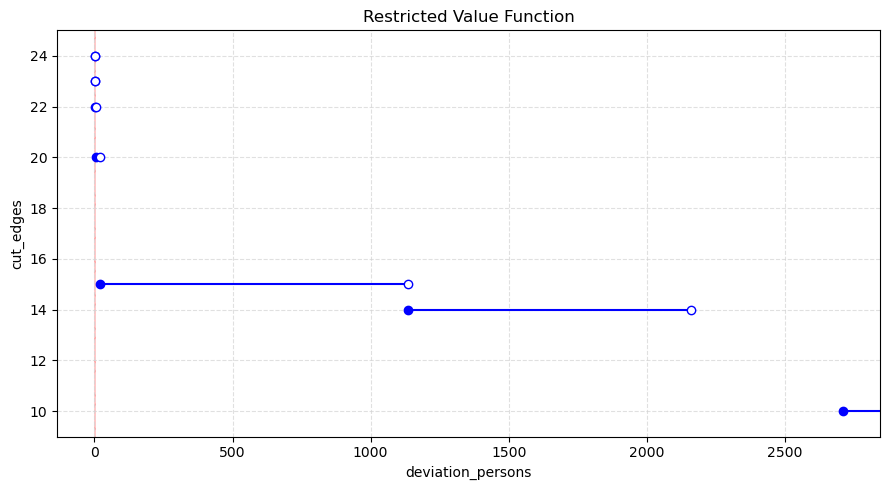

In [15]:
from pareto import ParetoFrontier

print(f"\n{'#' * 100}\nPareto Frontier for state {state},  objective {obj_type}\n{'#' * 100}\n")
pareto = ParetoFrontier(senses, obj_names, state=state, level='county')

if not  plans:
    print("No plan found!")
else:
    for plan, obj_bound, dev in result:
        upper_bound = [dev,  1/obj_bound[0] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[0]]
        lower_bound = [dev,  1/obj_bound[1] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[1]]
        
        pareto.add_plan(plan, upper_bound, lower_bound)
            
print("Pareto front plans:", pareto.plans)
print("Pareto front upper bounds:", pareto.upper_bounds)
print("Pareto front lower bounds:", pareto.lower_bounds) 

extra_points = None
extra_colors = None
        
pareto.tighten_lower_bounds()

if infeasible_region[1] > 0.5:
    max_dev = max(upper_bound[0] for upper_bound in pareto.upper_bounds)
    max_obj = max(upper_bound[1] for upper_bound in pareto.upper_bounds)
    min_obj = min(upper_bound[1] for upper_bound in pareto.upper_bounds)
    o1lim=[-1, max_dev+100]
    o2lim=[min_obj*0.9, max_obj*(1.1)]
else:
    o1lim = None
    o2lim = None

pareto.plot_with_custom_x_ranges(method = 'epsilon_constraint_method', splits=None,
                                 o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region,
                                 extra_points=extra_points, extra_colors=extra_colors)


####################################################################################################
Pareto maps for state MT, objective cut_edges
####################################################################################################



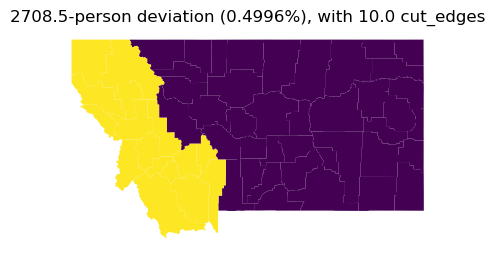

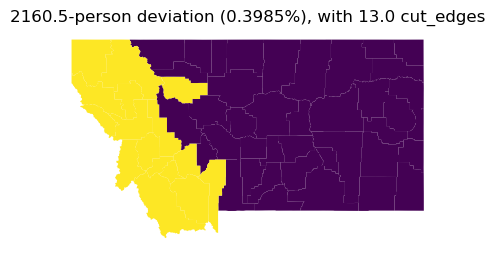

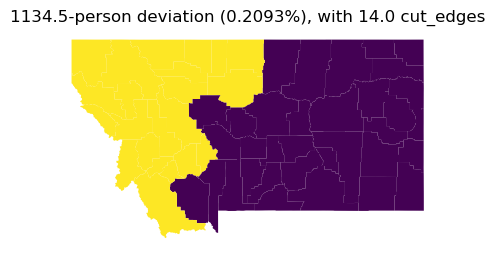

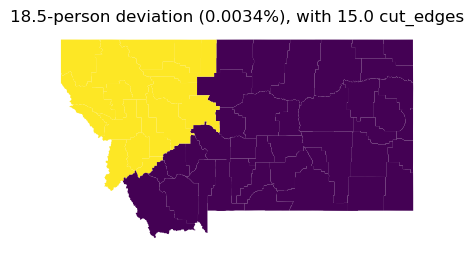

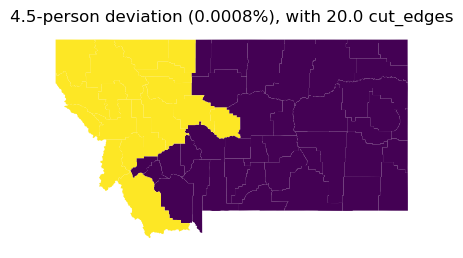

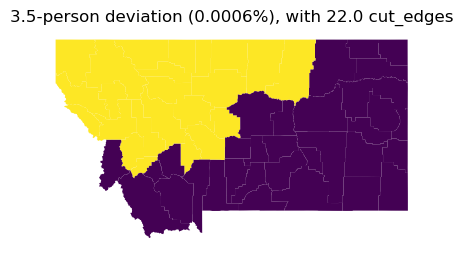

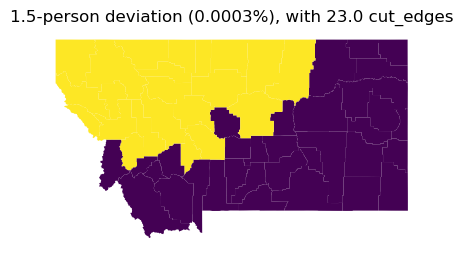

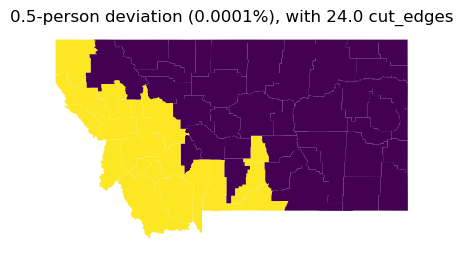

In [11]:
from draw import *

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: round(x, 0)}

for plan, obj_bound, dev in result:
    ub = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[0])
    lb = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[1])
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    if ub != lb:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), obj_bounds [{ub}, {lb}] {obj_type}"
    else:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), with {ub} {obj_type}"

    draw_plan(filepath, filename2, G, plan, title=title, year=year)